In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

from datasets.shanghaitech_rgbd import ShanghaiTechRGBD
from datasets.shanghaitech import ShanghaiTechA, ShanghaiTechB

In [2]:
dataset = 'shanghai-tech-b'
arch = 'bagnet9'
pool_num = 5

tr_data = ShanghaiTechB(
    dataset=dataset,
    arch=arch,
    json_path=os.path.join('json', dataset, 'train.json'),
    crop_size=(768, 1024),
    phase='train',
    sigma=15,
    pool_num=pool_num,
    up_scale=1,
)


vl_data = ShanghaiTechA(
    dataset=dataset,
    arch=arch,
    json_path=os.path.join('json', dataset, 'val.json'),
    crop_size=(512, 512),
    phase='val',
    sigma=9,
    pool_num=pool_num,
    up_scale=1,
)

In [3]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def inputs_convert(img):
    c, _, _ = img.size()
    if c > 3:
        img = img[0:3,:,:].to('cpu').detach().numpy().copy()
    else:
        img = img[:,:,:].to('cpu').detach().numpy().copy()
    img = img.transpose(1,2,0)
    img = img*std+mean
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


num:  tensor(117.0020) sum:  tensor(117.0020) in size:  torch.Size([3, 768, 1024]) out size:  torch.Size([1, 95, 127])


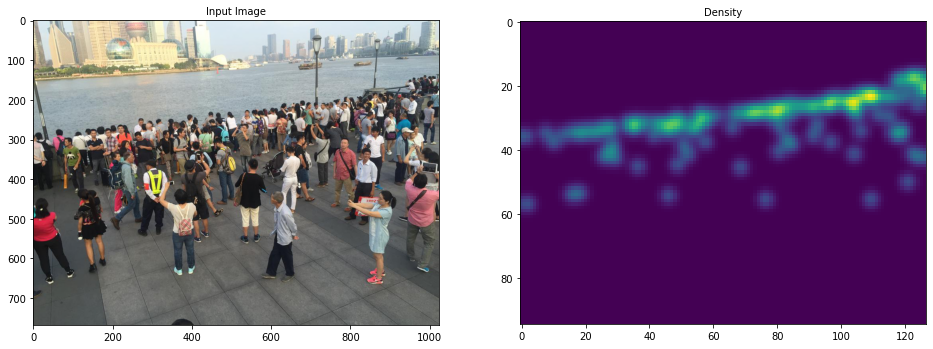

In [5]:
import torch
plt.figure(figsize=(16, 16))

i = 6
im, tar, num, _ = tr_data[i]

print('num: ', num, 'sum: ', tar.sum(), 'in size: ', im.size(), 'out size: ', tar.size())
im = inputs_convert(im)
plt.subplot(1, 2, 1)
plt.title('Input Image', fontsize=10) 
plt.imshow(im)

plt.subplot(1, 2, 2)
plt.title('Density', fontsize=10) 
tar = np.asarray(tar.squeeze())
plt.imshow(tar)